In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/odb-paris/ParisHousing.csv


In [2]:
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [3]:
data = pd.read_csv('/kaggle/input/odb-paris/ParisHousing.csv', index_col = 0) #применять в случае если 1 столбец пустой

In [4]:
data.head()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


In [5]:
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  object 
 2   floors             10000 non-null  int64  
 3   cityCode           10000 non-null  int64  
 4   cityPartRange      10000 non-null  int64  
 5   numPrevOwners      10000 non-null  int64  
 6   made               10000 non-null  int64  
 7   isNewBuilt         10000 non-null  bool   
 8   hasStormProtector  10000 non-null  bool   
 9   basement           10000 non-null  int64  
 10  attic              10000 non-null  int64  
 11  garage             10000 non-null  int64  
 12  hasStorageRoom     10000 non-null  bool   
 13  hasGuestRoom       10000 non-null  int64  
 14  price              10000 non-null  float64
 15  category           10000 non-null  object 
 16  PoolAndYard        1000

((10000, 17), None)

In [6]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
PoolAndYard          0
dtype: int64

In [7]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange',
       'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement',
       'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price',
       'category', 'PoolAndYard'],
      dtype='object')

# EDA

In [8]:
plt.style.use('fivethirtyeight')

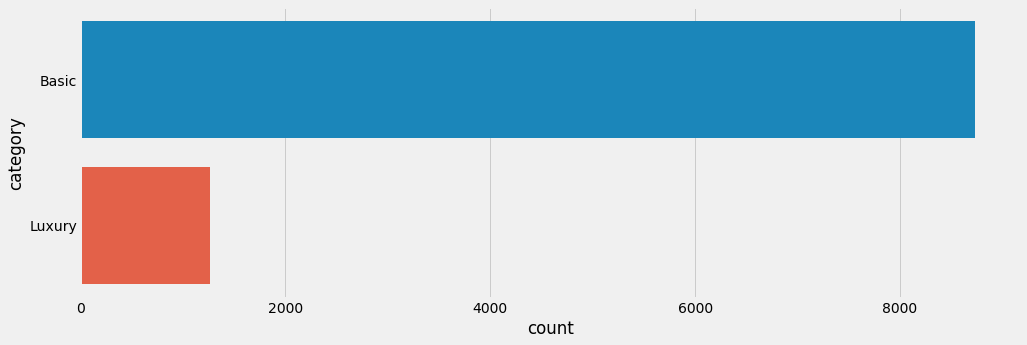

In [9]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'category' , data = data)
plt.show()

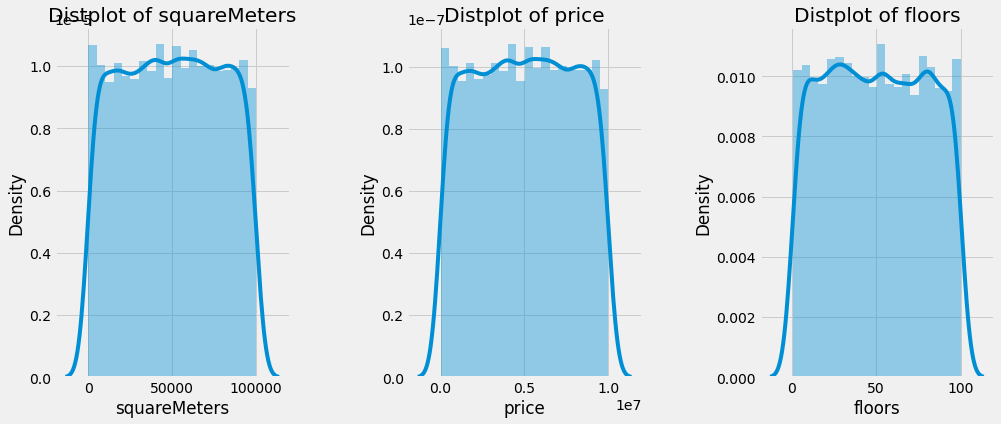

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['squareMeters' , 'price' , 'floors']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

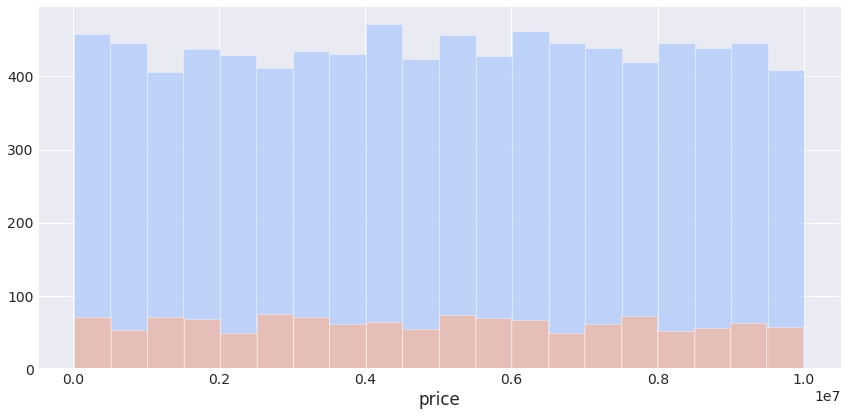

In [11]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="category",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'price',bins=20,alpha=0.7)

# Prepare dataset

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['numberOfRooms'] = label_encoder.fit_transform(data["numberOfRooms"])
data['category'] = label_encoder.fit_transform(data["category"])
data['PoolAndYard'] = label_encoder.fit_transform(data["PoolAndYard"])

In [13]:
data[['hasStormProtector', 'isNewBuilt', 'hasStorageRoom']] = data[['hasStormProtector', 
                                                                 'isNewBuilt', 'hasStorageRoom']].astype(int)

In [14]:
data.head()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,87,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0,1
1,80771,81,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1,0
2,55712,15,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0,1
3,32316,31,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0,3
4,70429,38,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1,0


In [15]:
data.describe()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49870.13120,49.534500,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,0.126500,1.497700
std,28774.37535,29.017712,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,0.332429,1.124954
min,89.00000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,0.000000,0.000000
25%,25098.50000,24.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,0.000000,0.000000
50%,50105.50000,49.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,0.000000,2.000000
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,0.000000,3.000000
max,99999.00000,99.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07,1.000000,3.000000


# Стандартизация данных

Поскольку алгоритм K-ближайших соседей делает прогнозы относительно точки данных (семпла), используя наиболее близкие к ней наблюдения, существующий масштаб показателей в датасете имеет большое значение.

Из-за этого специалисты по машинному обучению обычно стандартизируют набор данных, что означает корректировку каждого значения x так, чтобы они находились примерно в одном диапазоне.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)

В качестве результата мы получили массив NumPy со всеми точками данных из датасета, но нам желательно преобразовать его в формат DataFrame библиотеки pandas

In [18]:
scaled_data = pd.DataFrame(scaled_features, columns = data.columns)

In [19]:
scaled_data.head()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0.891562,1.291190,0.440453,-1.408453,-0.874027,0.867593,-0.052484,-0.998202,1.0002,-0.250333,1.374130,1.537488,-1.006018,0.631373,0.891687,-0.380552,-0.442440
1,1.073956,1.084409,1.652041,-0.373880,0.866993,0.167441,1.021904,1.001802,-0.9998,-0.479772,-0.895592,-1.622370,0.994018,-0.942810,1.074814,2.627763,-1.331410
2,0.203033,-1.190177,-1.082685,-0.543643,0.170585,0.867593,1.666537,-0.998202,-0.9998,-0.728678,1.321265,-1.595657,0.994018,1.261046,0.201994,-0.380552,-0.442440
3,-0.610092,-0.638763,-1.532703,-0.768361,1.563401,-0.532710,0.699588,-0.998202,1.0002,-1.520589,0.730080,-0.740816,-1.006018,-0.627973,-0.611997,-0.380552,1.335499
4,0.714521,-0.397518,1.375106,-0.419941,-0.874027,0.517517,-1.664066,1.001802,-0.9998,1.182616,-0.898010,-0.996505,0.994018,-0.313136,0.716512,2.627763,-1.331410


# Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [21]:
wcss=[]
for i in range(1,100, 20):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

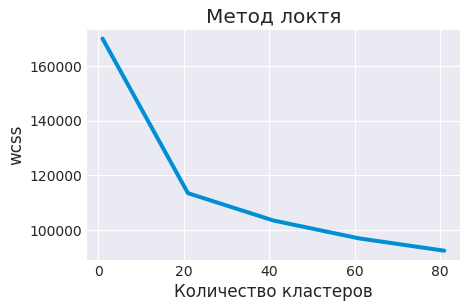

In [22]:
plt.plot(range(1,100, 20), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

In [23]:
from itertools import combinations

In [24]:
lst_vars=list(combinations(scaled_data.columns,2))

In [25]:
len(lst_vars)

136